In [32]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# libraries for models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

# metrics evaluation libraries
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay

In [33]:
project_data = pd.read_csv("ExpenseData2.csv")

In [34]:
project_data.head()

,Date,Place,Item,Quantity,Price,Category
0,1/9/2023,Arpico Super Store,Prima Kottumee,5.0,650.0,Food
1,1/9/2023,BlueCrossLife,X-RAY DENTAL IOPA,1.0,1800.0,Medical
2,1/9/2023,BlueCrossLife,X-RAY DENTAL OPG - HOSPITAL VIEW,1.0,3100.0,Medical
3,1/9/2023,IUS Pharmacy & Grocery,Glemaz - 2mg,7.0,22.0,Medical
4,1/9/2023,IUS Pharmacy & Grocery,Glucophage - 2mg,7.0,350.0,Medical


In [35]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30195 entries, 0 to 30194
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      29759 non-null  object 
 1   Place     29759 non-null  object 
 2   Item      30195 non-null  object 
 3   Quantity  29759 non-null  float64
 4   Price     29759 non-null  float64
 5   Category  30195 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.4+ MB


In [36]:
project_data['Total'] = project_data['Price'] * project_data['Quantity']

In [39]:
project_data['Month'] = project_data['Date'].fillna(0).astype(str).str[0].astype(int)


In [41]:
project_data = project_data.dropna(subset=['Date'])
project_data['Month'] = project_data['Date'].astype(str).str[0].astype(int)


In [42]:
project_data['Month'] = project_data['Date'].str[0].astype(int)
# project_data['Month'] = project_data['Date'].fillna(0).str[0].astype(int)


In [43]:
project_data.head()

,Date,Place,Item,Quantity,Price,Category,Total,Month
0,1/9/2023,Arpico Super Store,Prima Kottumee,5.0,650.0,Food,3250.0,1
1,1/9/2023,BlueCrossLife,X-RAY DENTAL IOPA,1.0,1800.0,Medical,1800.0,1
2,1/9/2023,BlueCrossLife,X-RAY DENTAL OPG - HOSPITAL VIEW,1.0,3100.0,Medical,3100.0,1
3,1/9/2023,IUS Pharmacy & Grocery,Glemaz - 2mg,7.0,22.0,Medical,154.0,1
4,1/9/2023,IUS Pharmacy & Grocery,Glucophage - 2mg,7.0,350.0,Medical,2450.0,1


In [44]:
project_data_new = project_data[['Category','Quantity','Month','Price','Total']]

In [45]:
project_data_new.head()

,Category,Quantity,Month,Price,Total
0,Food,5.0,1,650.0,3250.0
1,Medical,1.0,1,1800.0,1800.0
2,Medical,1.0,1,3100.0,3100.0
3,Medical,7.0,1,22.0,154.0
4,Medical,7.0,1,350.0,2450.0


In [46]:
project_data.describe()

,Quantity,Price,Total,Month
count,29759.00000,29759.000000,29759.000000,29759.000000
mean,1.00289,386.827548,389.956685,3.848684
std,0.12855,318.035434,383.121829,2.887440
min,1.00000,10.000000,30.000000,1.000000
25%,1.00000,207.000000,207.000000,1.000000
50%,1.00000,311.000000,311.000000,3.000000
75%,1.00000,416.000000,416.000000,6.000000
max,7.00000,12900.000000,20160.000000,9.000000


In [47]:
project_data.shape

(29759, 8)

In [48]:
project_data.columns

Index(['Date', 'Place', 'Item', 'Quantity', 'Price', 'Category', 'Total',
       'Month'],
      dtype='object')

In [49]:
project_data.isna().sum()

Date        0
Place       0
Item        0
Quantity    0
Price       0
Category    0
Total       0
Month       0
dtype: int64

In [50]:
numeric_columns = [column for column in project_data.columns if project_data[column].dtype == 'int64']
print(numeric_columns)

[]


In [51]:
for column in numeric_columns:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=project_data, x=column, palette="crest")
    plt.show()

In [52]:
categorical_columns = [column for column in project_data.columns if project_data[column].dtype != 'int64']
print(categorical_columns)

['Date', 'Place', 'Item', 'Quantity', 'Price', 'Category', 'Total', 'Month']


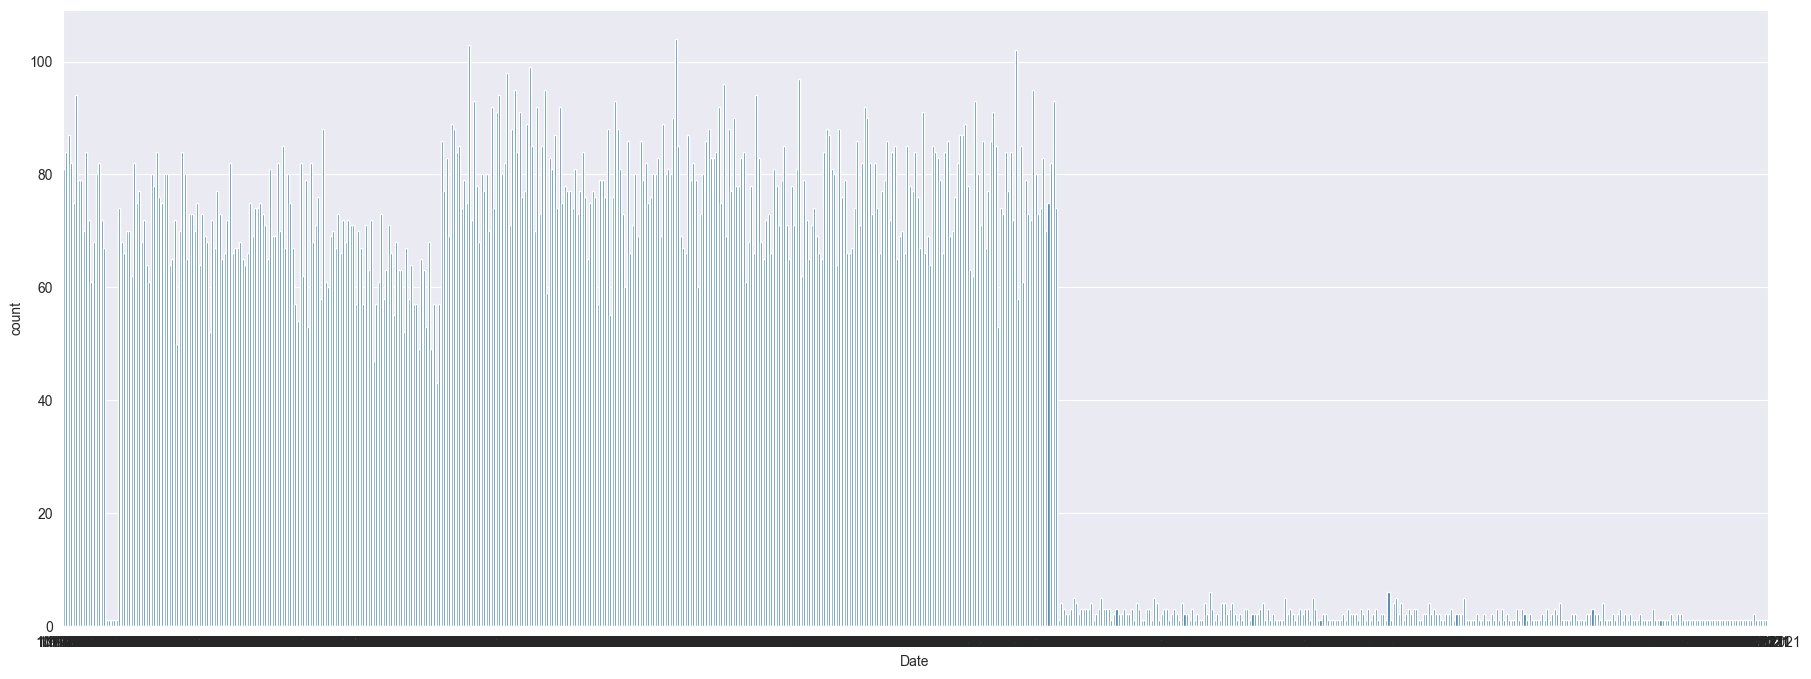

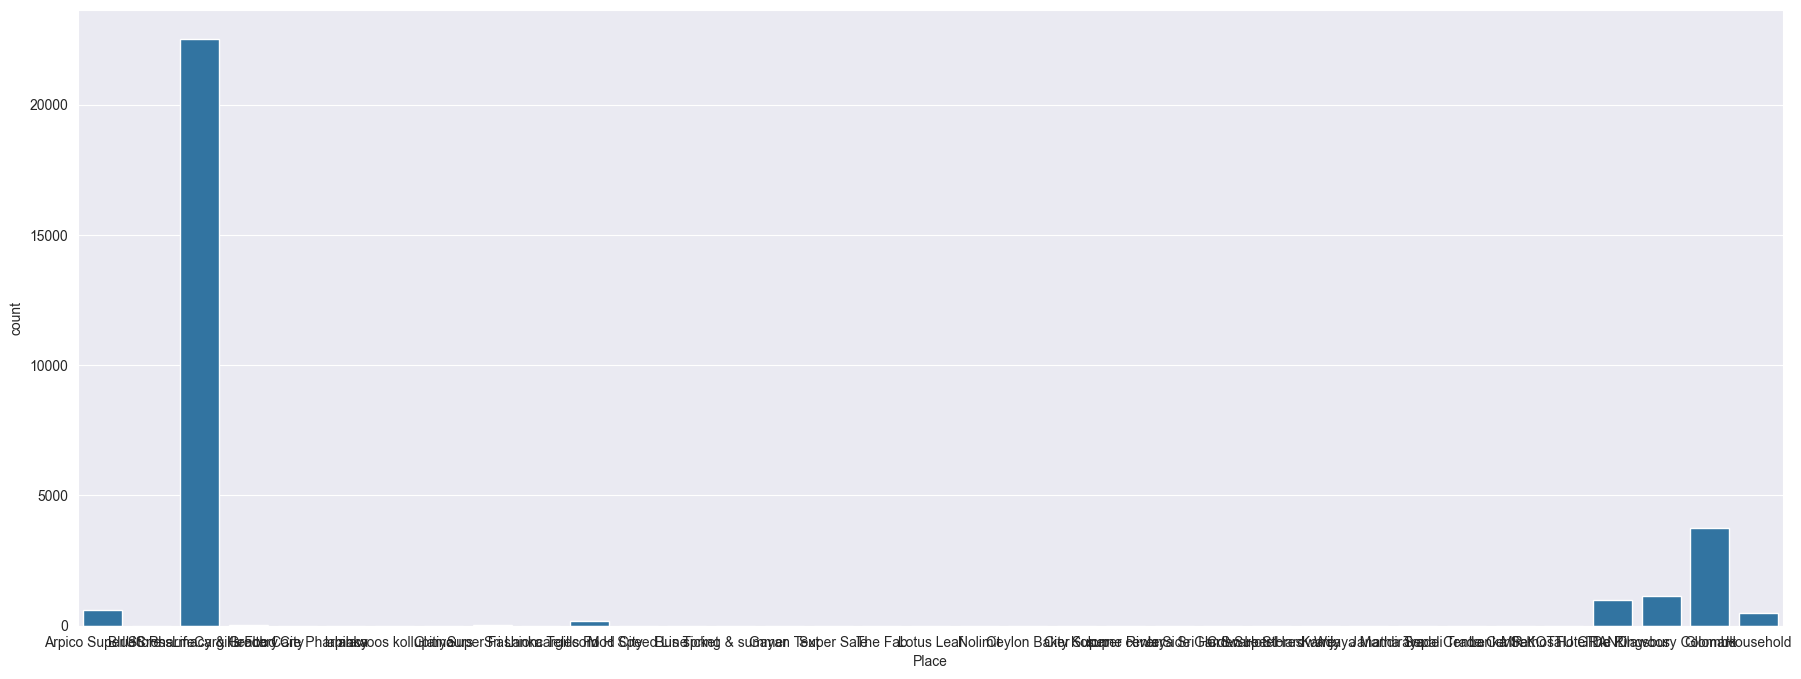

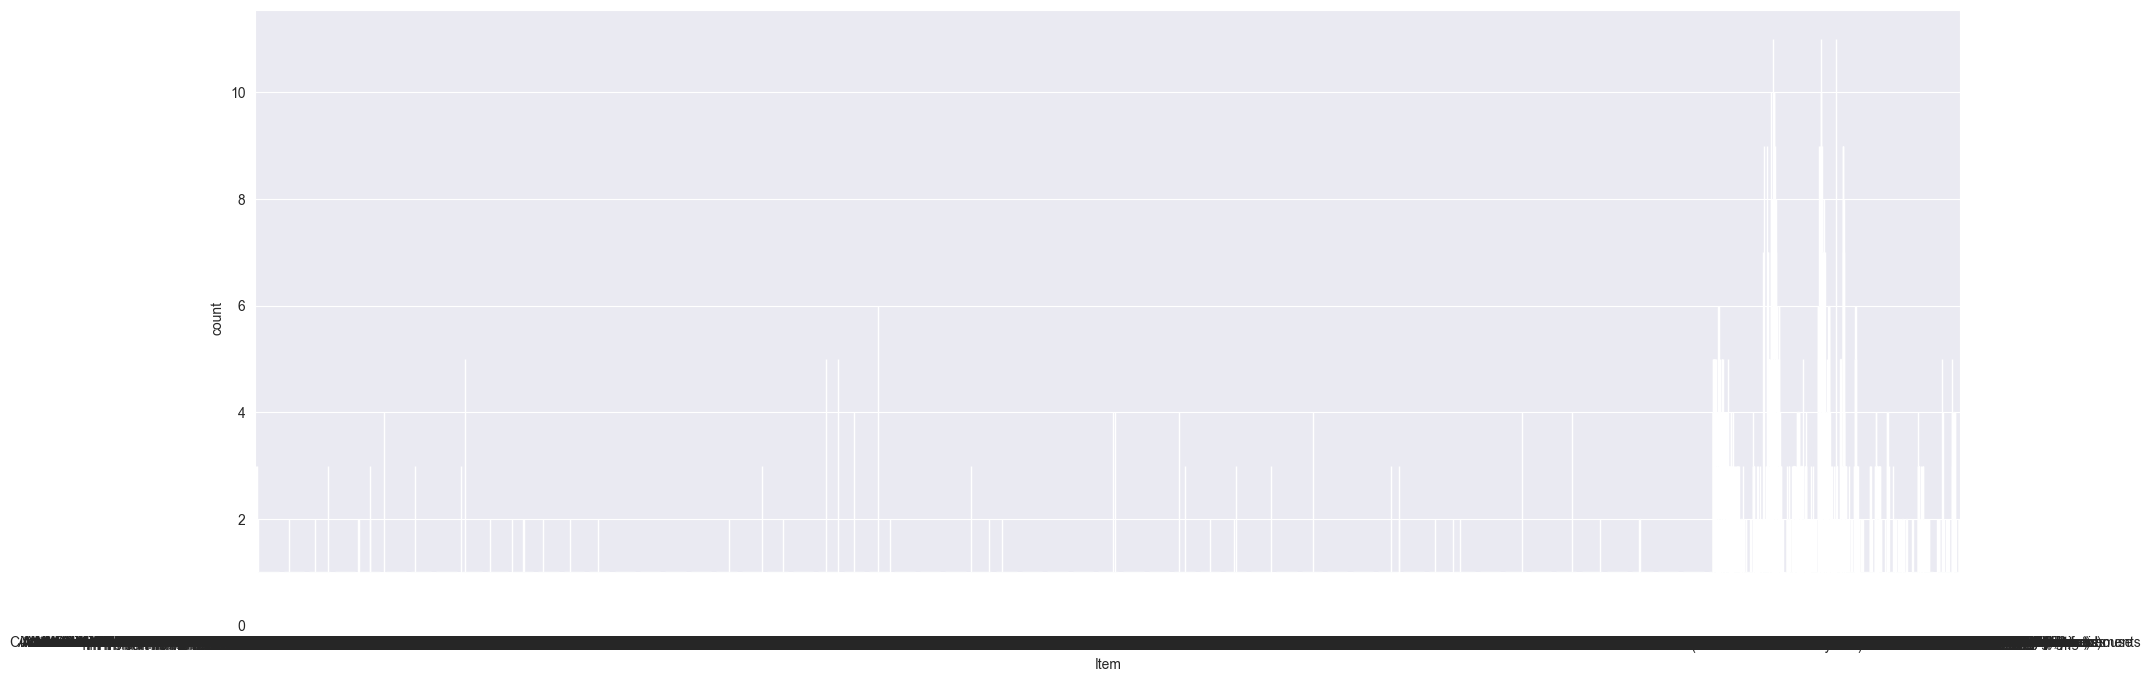

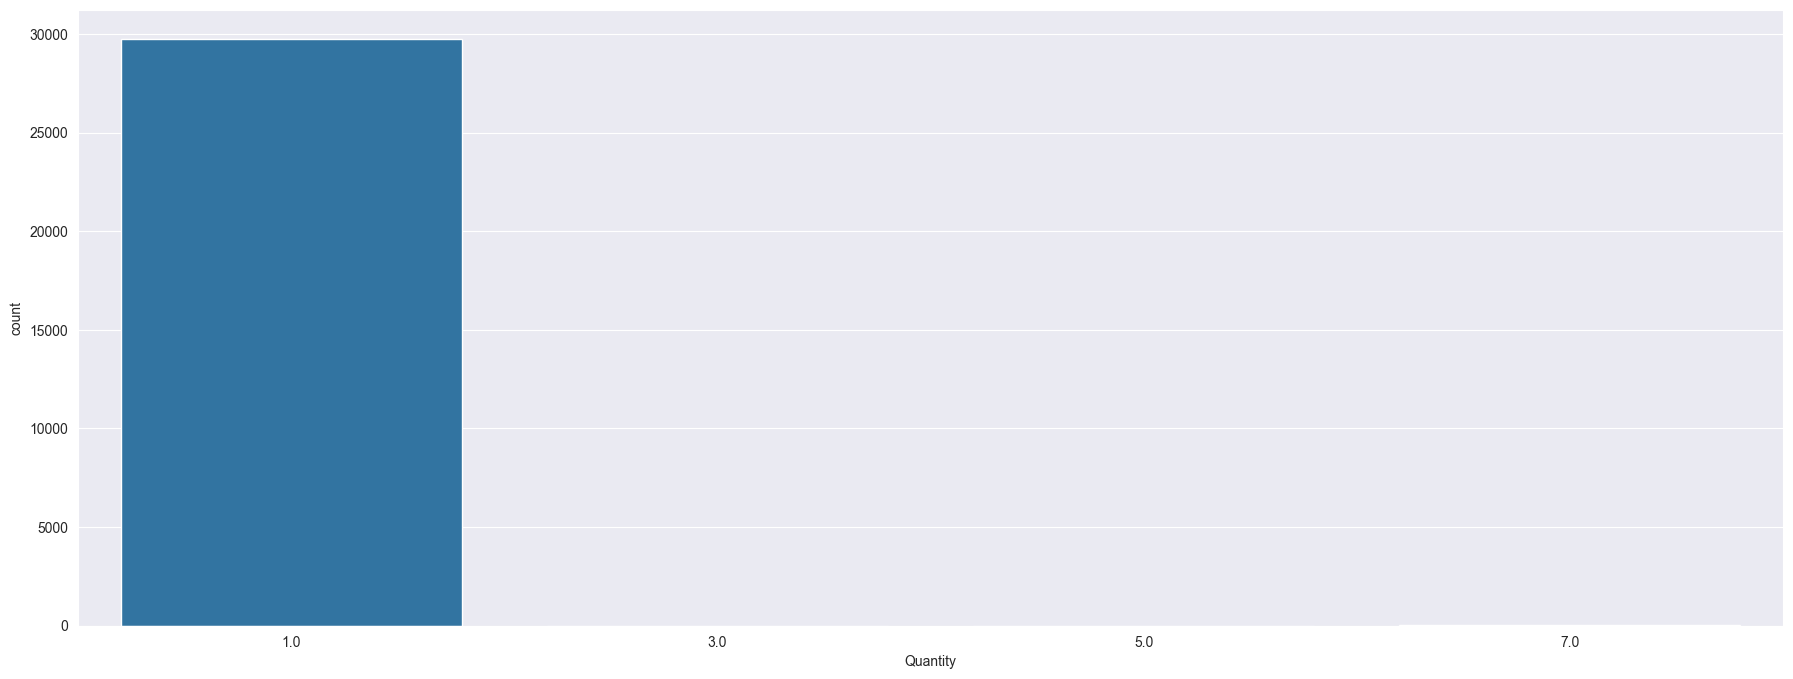

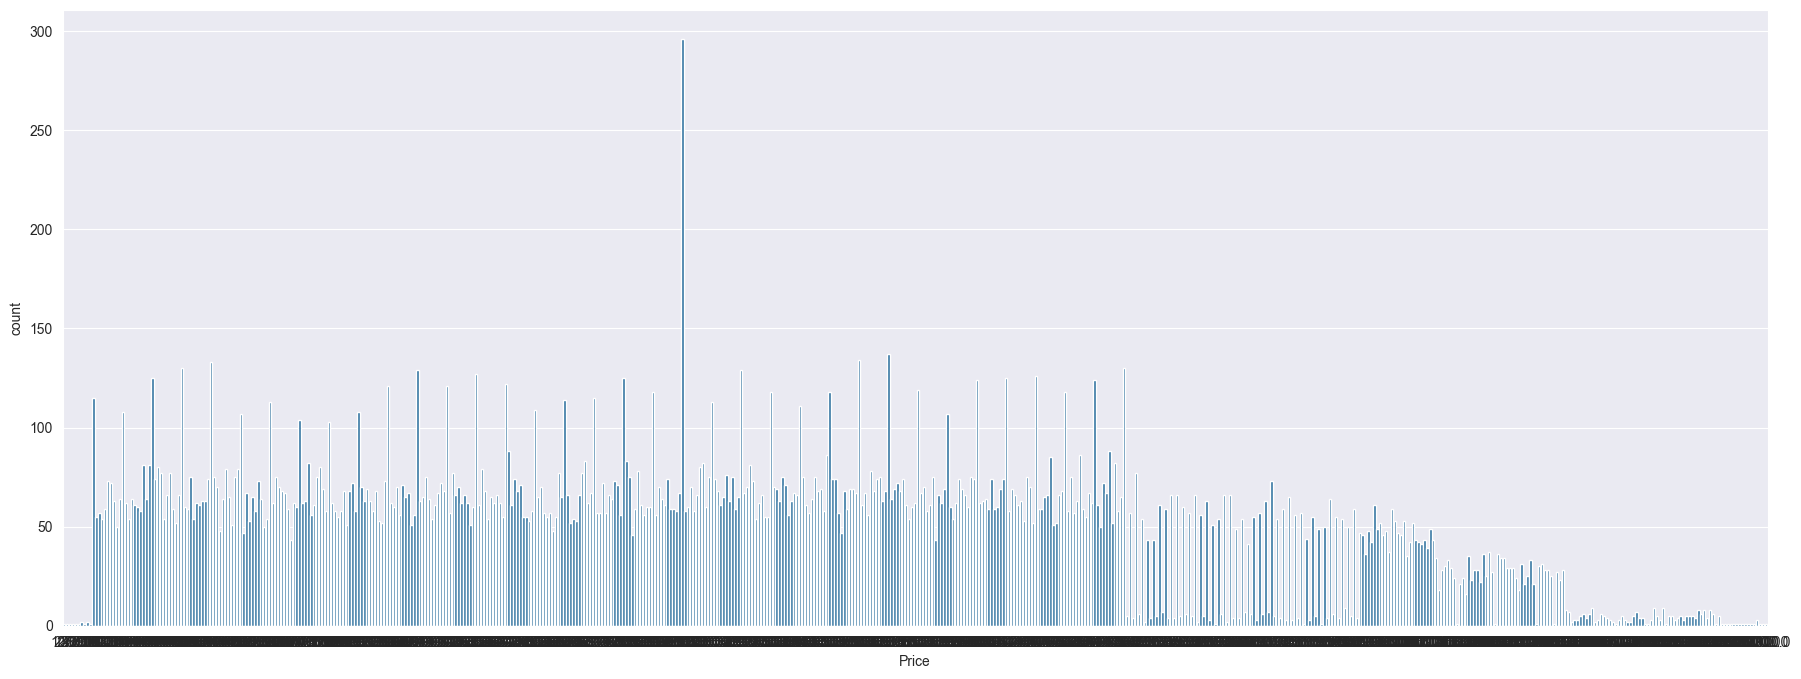

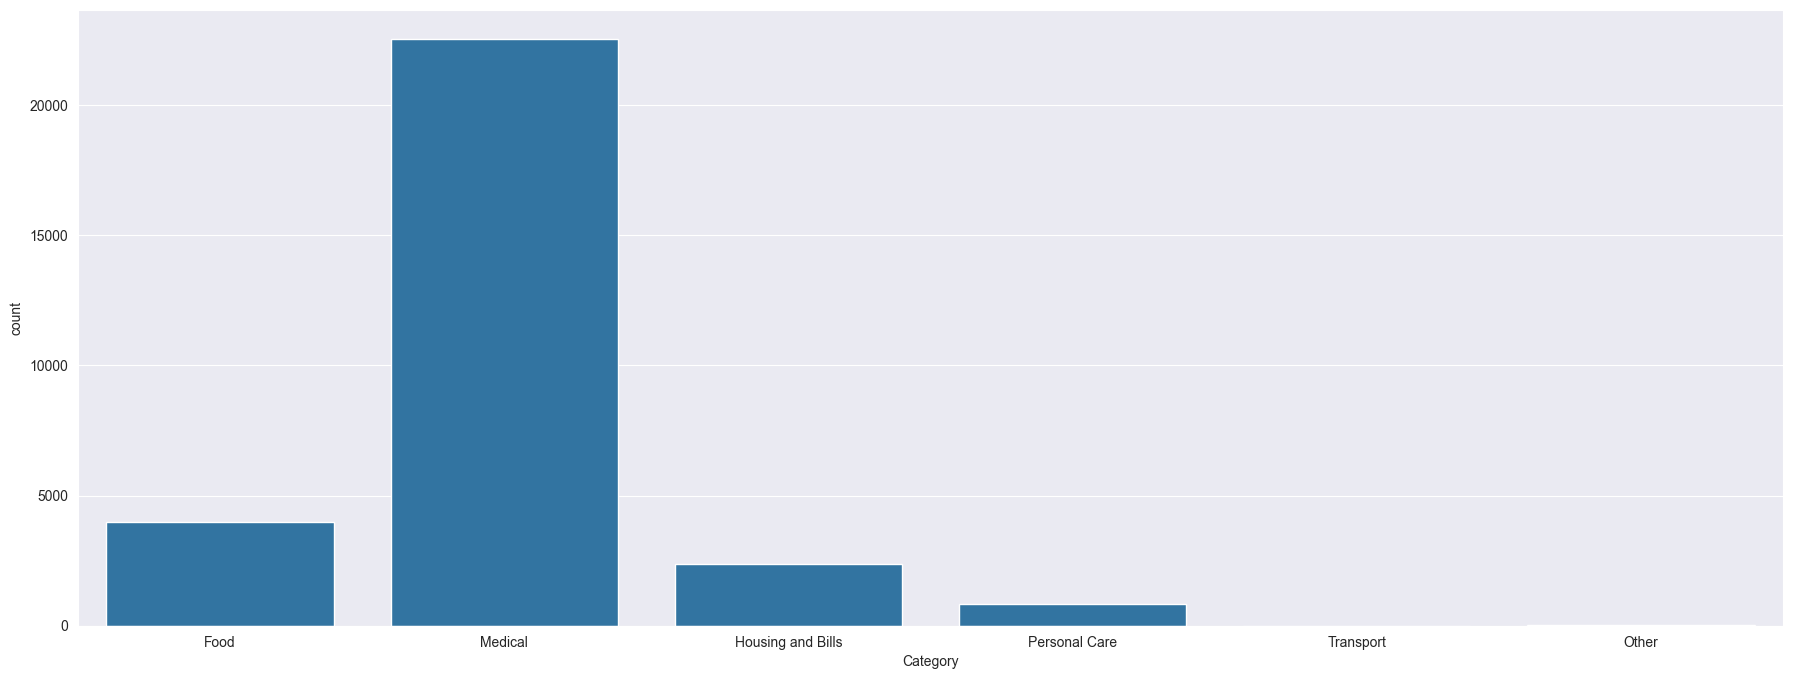

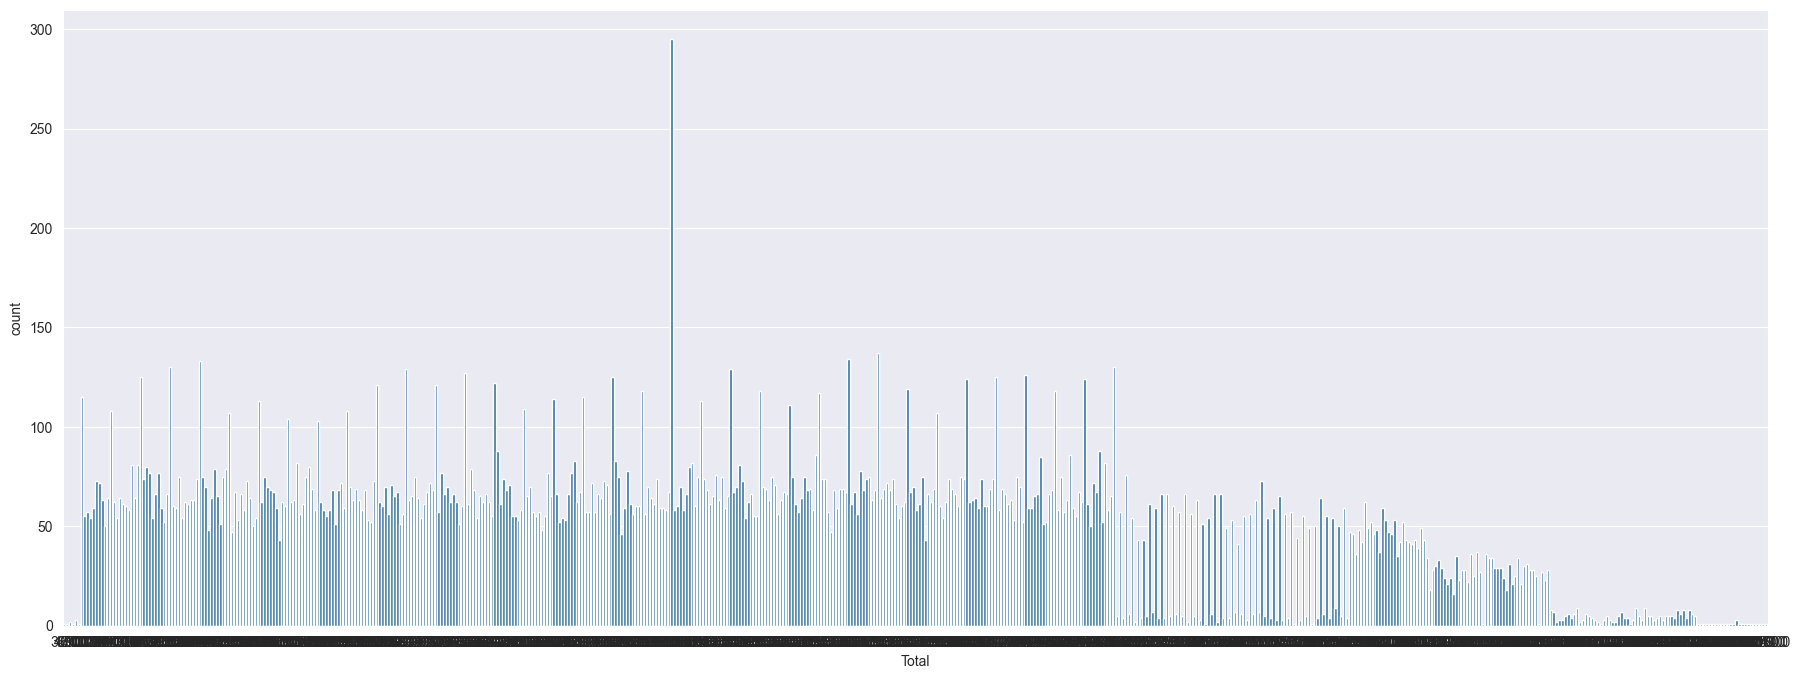

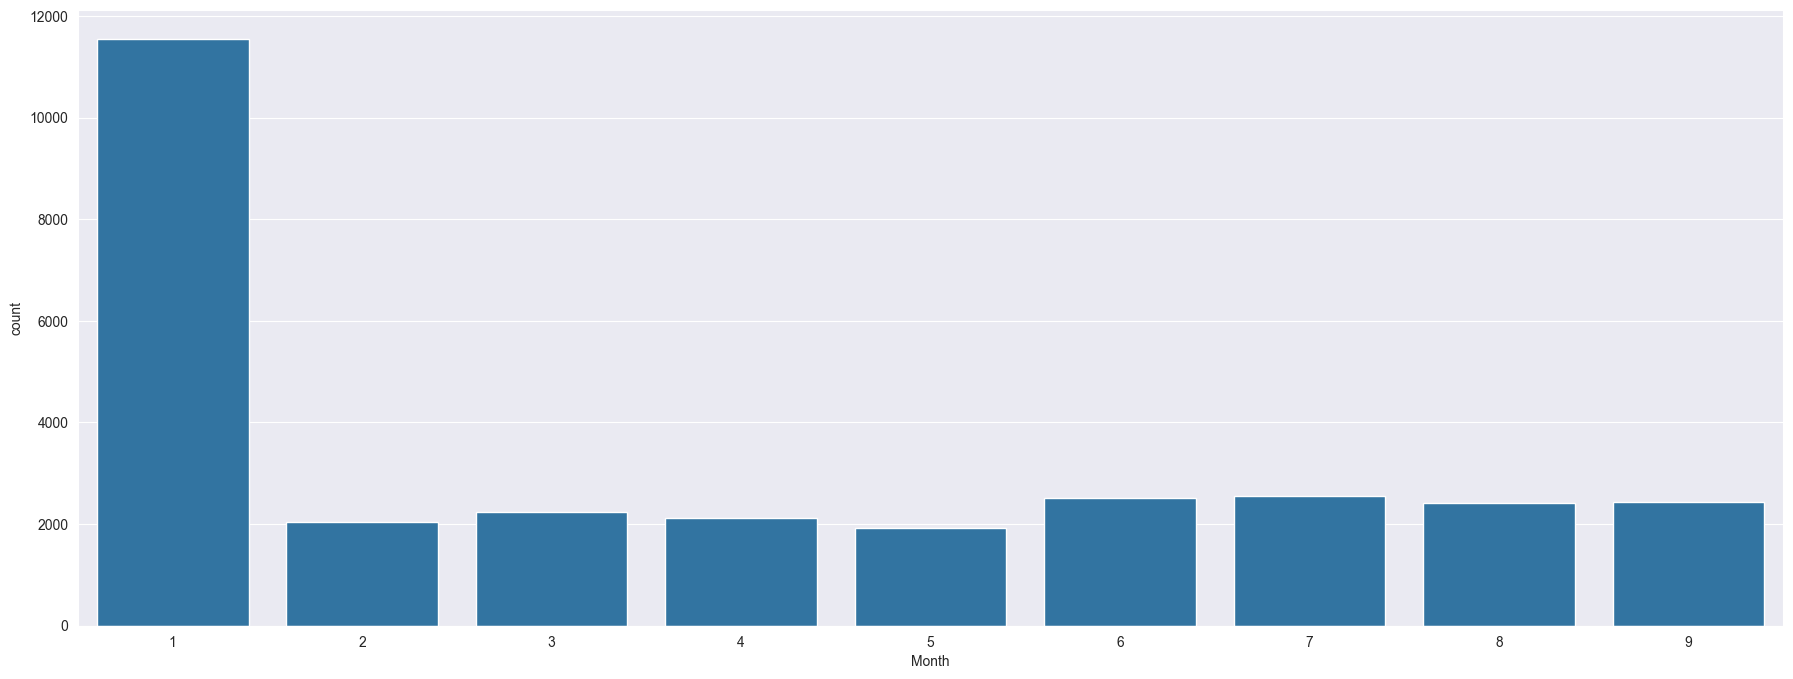

In [53]:
for column in categorical_columns:
    plt.figure(figsize=(22,8))
    sns.countplot(x=project_data[column])
    plt.show()

In [54]:
for column in numeric_columns:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=project_data, x=column,hue_norm='Category', fill=True, alpha=.5, palette="crest")
    plt.show()

<Axes: >

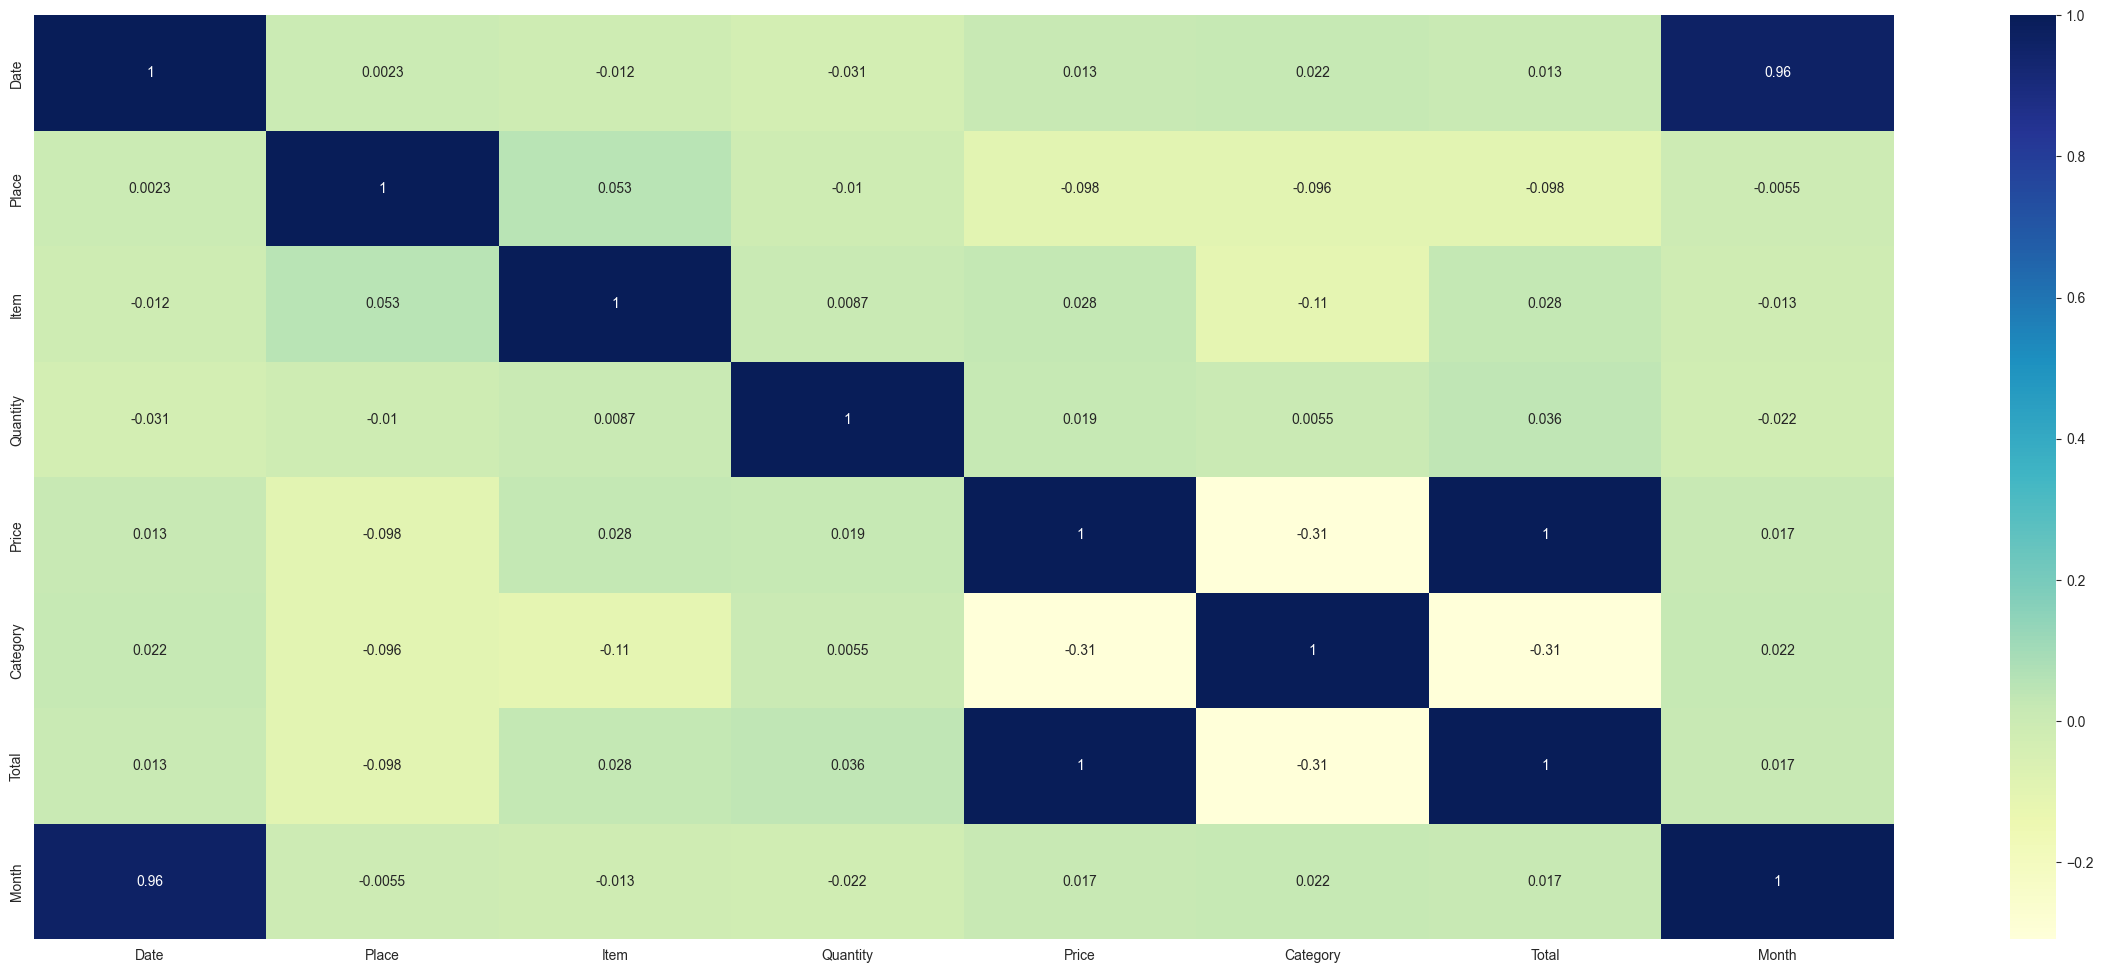

In [55]:
df1 = project_data.copy()

encoder = LabelEncoder()
for column in categorical_columns:
    df1[column] = encoder.fit_transform(df1[column])

plt.figure(figsize=(30,12))
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [56]:
X_train=project_data.drop(columns=["Place","Date","Item"])
y_train=project_data["Month"]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [57]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (20831, 5)
Test dataset shape (20831,)


In [58]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
print(numeric_columns)
print('*'*100)
categorical_columns = X_train.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Quantity', 'Price', 'Total', 'Month'], dtype='object')
****************************************************************************************************
Index(['Category'], dtype='object')


In [59]:
numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)
print('*'*100)

categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

print(categorical_features)

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])

processing

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Quantity', 'Price', 'Total', 'Month'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['Category'], dtype='object'))])

In [60]:
def prepare_model(algorithm):
    model = Pipeline(steps= [
        ('processing',processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

In [61]:
def prepare_confusion_matrix(algo, model):
    print(algo)
    plt.figure(figsize=(12,8))
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 

In [62]:
def prepare_classification_report(algo, model):
    print(algo+' Report :')
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

In [63]:
def prepare_roc_curve(algo, model):
    print(algo)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    #print(y_test)
    #print(y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

In [64]:
algorithms = [('bagging classifier', BaggingClassifier()), 
              ('KNN classifier', KNeighborsClassifier()), 
              ('Random Forest calssifier', RandomForestClassifier()), 
              ('Adaboost classifier', AdaBoostClassifier()), 
              ('Gradientboot classifier',GradientBoostingClassifier()),
              ('MLP', MLPClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

In [65]:
print(model_and_score)

{'bagging classifier': '99.98559838701935%', 'KNN classifier': '99.1983102107436%', 'Random Forest calssifier': '100.0%', 'Adaboost classifier': '79.96255580625031%', 'Gradientboot classifier': '99.87998655849455%', 'MLP': '96.38519514185589%'}


bagging classifier


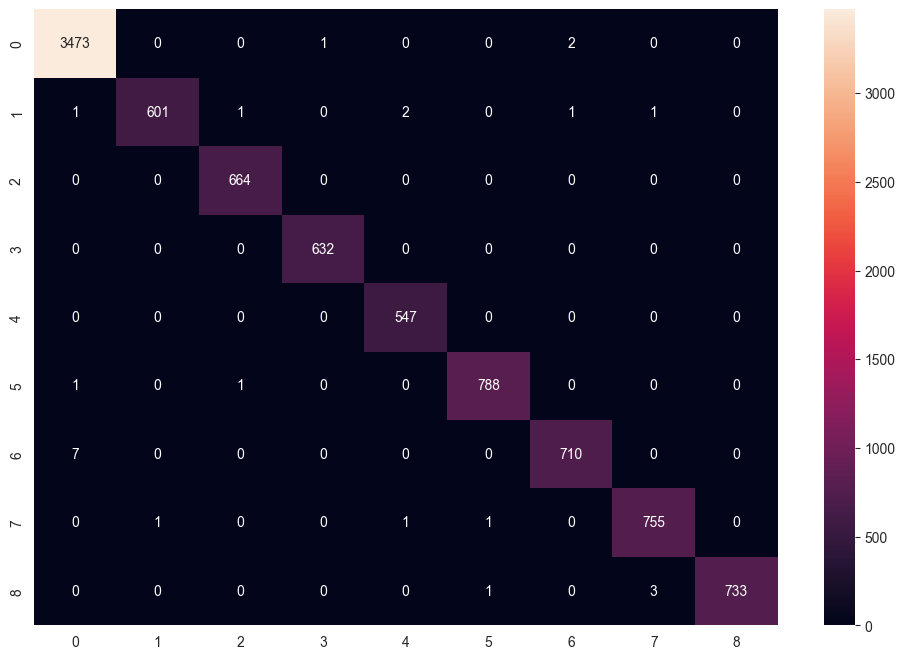

KNN classifier


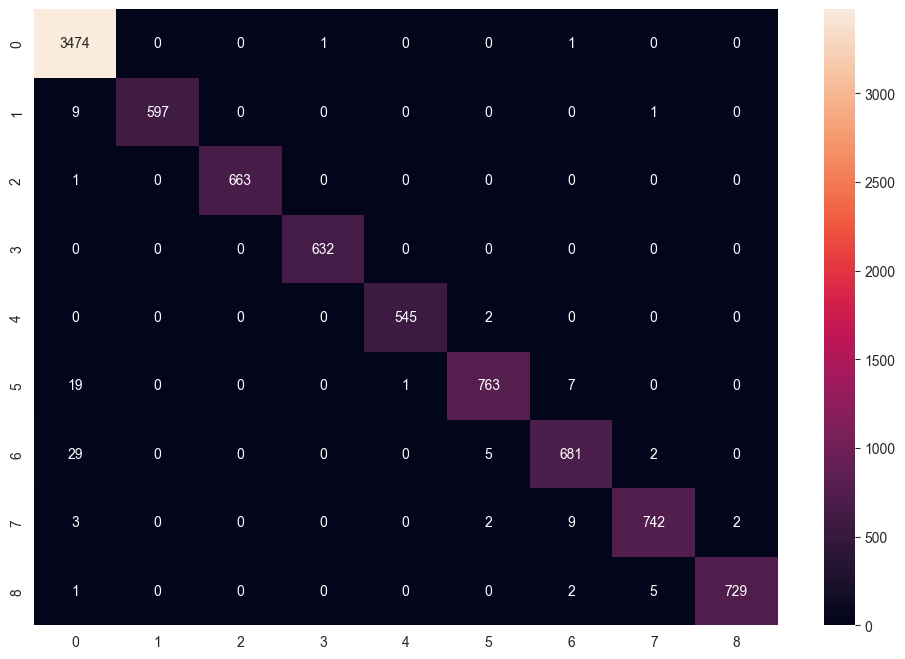

Random Forest calssifier


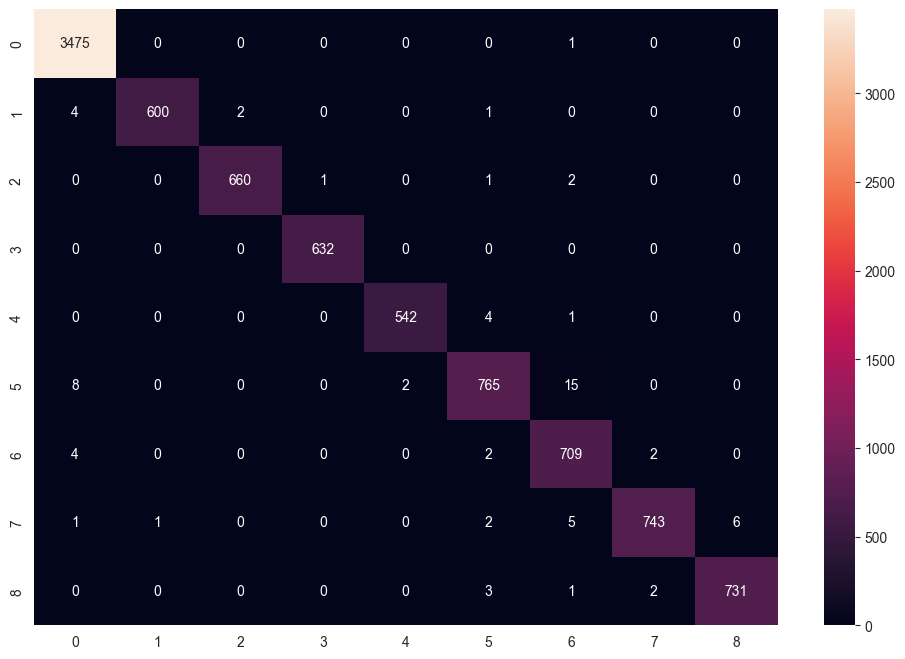

Adaboost classifier


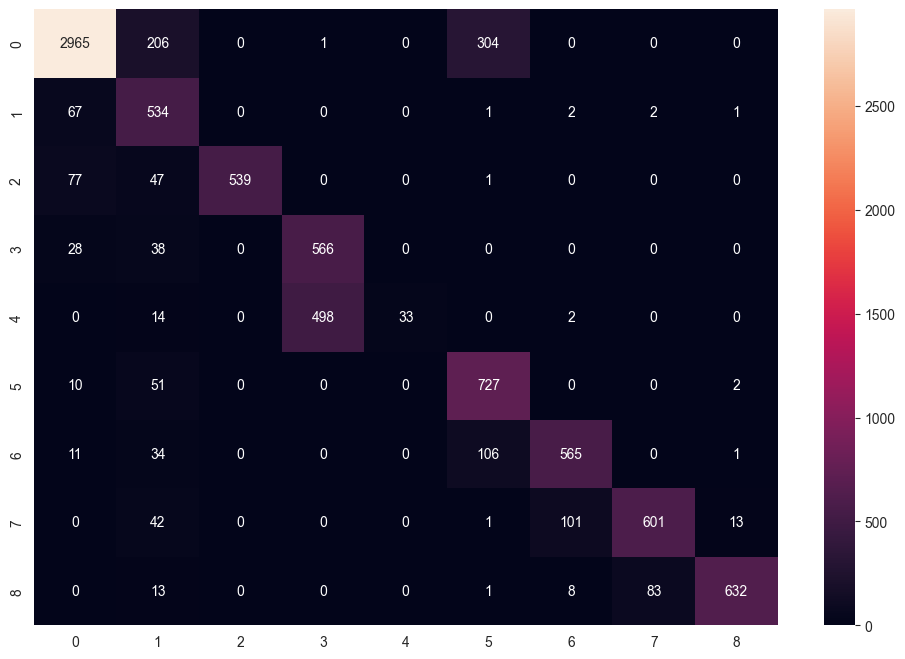

Gradientboot classifier


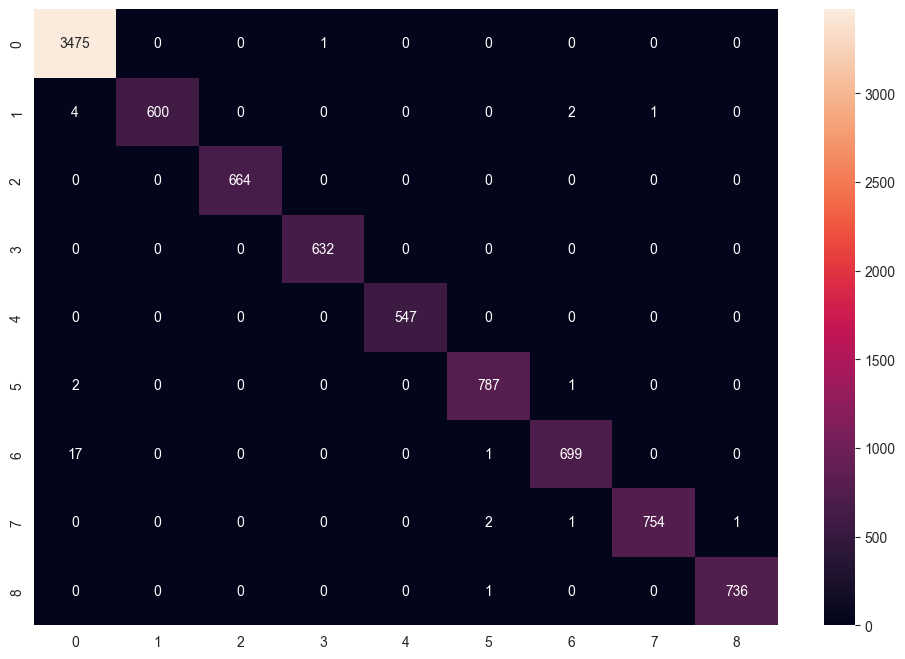

MLP


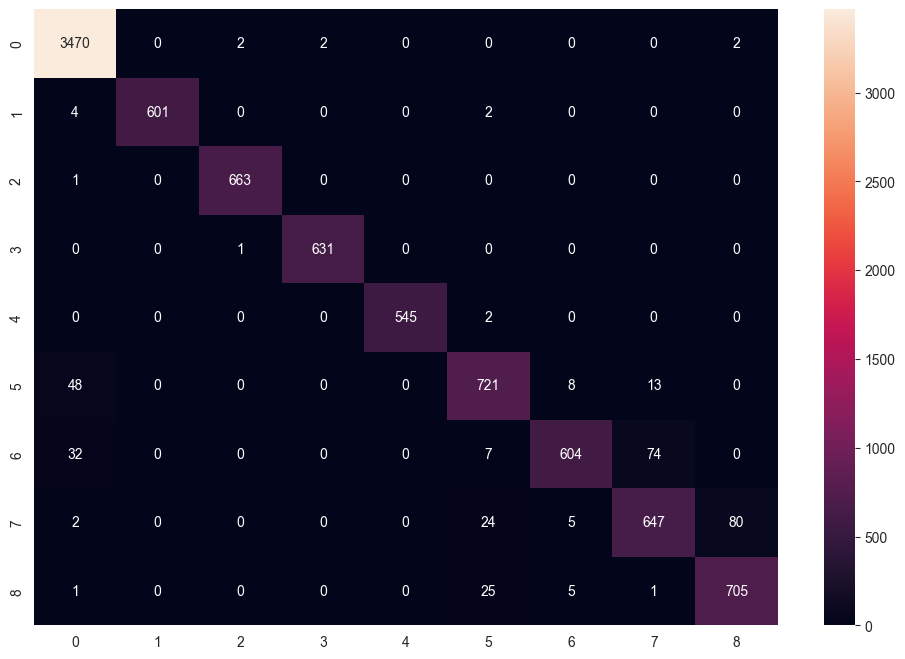

In [66]:
for index, tup in enumerate(trained_models):
    prepare_confusion_matrix(tup[0], tup[1])

In [67]:
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")

bagging classifier Report :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3476
           2       1.00      0.99      0.99       607
           3       1.00      1.00      1.00       664
           4       1.00      1.00      1.00       632
           5       0.99      1.00      1.00       547
           6       1.00      1.00      1.00       790
           7       1.00      0.99      0.99       717
           8       0.99      1.00      1.00       758
           9       1.00      0.99      1.00       737

    accuracy                           1.00      8928
   macro avg       1.00      1.00      1.00      8928
weighted avg       1.00      1.00      1.00      8928



KNN classifier Report :
              precision    recall  f1-score   support

           1       0.98      1.00      0.99      3476
           2       1.00      0.98      0.99       607
           3       1.00      1.00      1.00       664
           4       1.00 